In [145]:
# Import de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [146]:
# Carregamento de Dados
test = pd.read_csv(r'C:\Users\Luimp\Documents\Python\DAA\DAA\Datasets\test_data.csv', encoding='latin-1')
train = pd.read_csv(r'C:\Users\Luimp\Documents\Python\DAA\DAA\Datasets\training_data.csv', encoding='latin-1')

In [147]:
# Vizualização dos dados

In [148]:
test.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca


In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
dtypes: float64(8), object(5)
memory usage: 152.5+ KB


In [150]:
test.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS          599
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               1360
dtype: int64

In [151]:
train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [153]:
train.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

In [154]:
# Definição de variáveis preditoras e alvo
X_train = train.drop(columns=['AVERAGE_SPEED_DIFF'])
y_train = train['AVERAGE_SPEED_DIFF']
X_test = test

In [155]:
# Feature Engineering

# city_name é sempre porto, o que torna a coluna irrelevante
X_train = X_train.drop(columns=['city_name'])
X_test = X_test.drop(columns=['city_name'])

# record_date, uma data/hora (timestamp) como "2018-07-24 00:00:00" não é útil para um modelo. Se transformarmos em feutures numéricas, pode ser melhor para o modelo entender. Podemos extrair dia da semana, mês, hora do dia, etc.
X_train['record_date'] = pd.to_datetime(X_train['record_date']) 
X_train['day_of_week'] = X_train['record_date'].dt.dayofweek
X_train['month'] = X_train['record_date'].dt.month
X_train['hour'] = X_train['record_date'].dt.hour
X_train = X_train.drop(columns=['record_date'])
X_test['record_date'] = pd.to_datetime(X_test['record_date'])
X_test['day_of_week'] = X_test['record_date'].dt.dayofweek
X_test['month'] = X_test['record_date'].dt.month
X_test['hour'] = X_test['record_date'].dt.hour
X_test = X_test.drop(columns=['record_date'])


In [156]:
# Encoding

# Mapear as categorias de y_train para valores numéricos
y_train = y_train.map({'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4})

# Fatorizaçãoplt.figure
X_train['LUMINOSITY'] = pd.factorize(X_train['LUMINOSITY']) [0] + 1
X_test['LUMINOSITY'] = pd.factorize(X_test['LUMINOSITY']) [0] + 1


<Axes: >

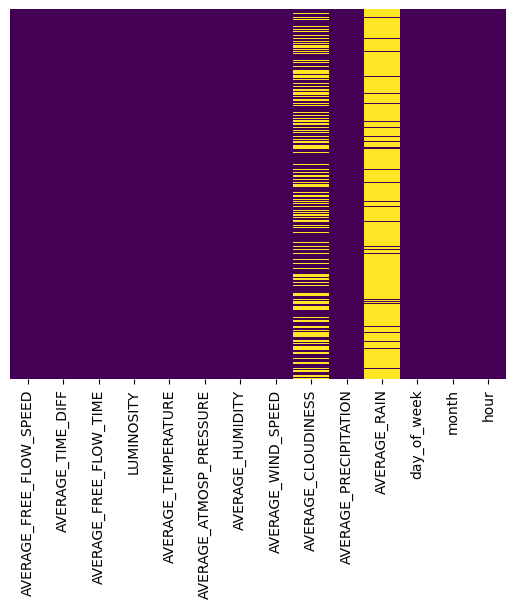

In [157]:
# Missing Values
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<Axes: >

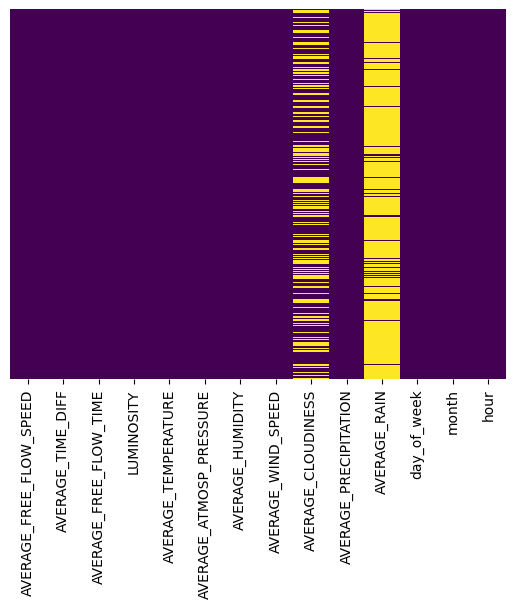

In [158]:
sns.heatmap(X_test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

<Axes: xlabel='AVERAGE_CLOUDINESS', ylabel='AVERAGE_ATMOSP_PRESSURE'>

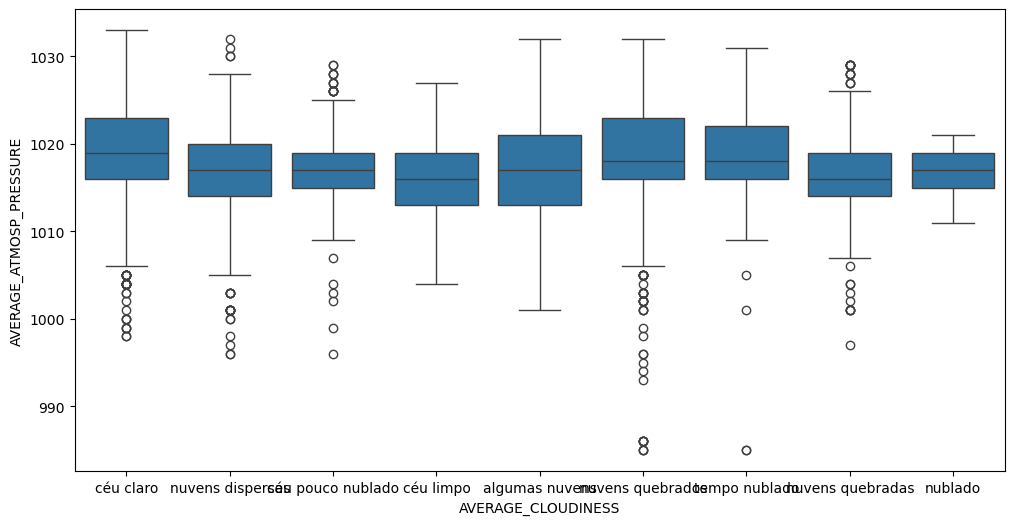

In [163]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AVERAGE_CLOUDINESS', y='AVERAGE_ATMOSP_PRESSURE', data=X_train)

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=2025)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

ValueError: could not convert string to float: 'céu claro'